In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Create a simple dataset
data = {
    'hours_studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'passed': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

In [3]:
# Step 2: Prepare the data
X = df[['hours_studied']]
y = df['passed']

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Add constant (intercept) term
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [7]:
# Step 3: Fit the logistic regression model
model = sm.Logit(y_train, X_train_scaled)
result = model.fit()

         Current function value: 0.000000
         Iterations: 35


C:\Python\Anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Python\Anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Python\Anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Python\Anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Python\Anaconda3\Lib\site-packages\statsm

In [8]:
# Step 4: Make predictions
y_pred_prob = result.predict(X_test_scaled)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

In [9]:
# Step 5: Calculate and display the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1 0]
 [0 2]]


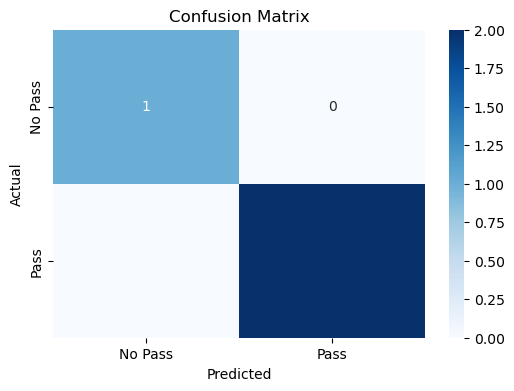

In [10]:
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Pass', 'Pass'], yticklabels=['No Pass', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Step 6: Calculate and display Cross-Entropy Loss (Log Loss)
from sklearn.metrics import log_loss
cross_entropy_loss = log_loss(y_test, y_pred_prob)
print(f"Cross-Entropy Loss: {cross_entropy_loss:.4f}")

Cross-Entropy Loss: 0.0000


In [12]:
# Step 7: Calculate and display ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

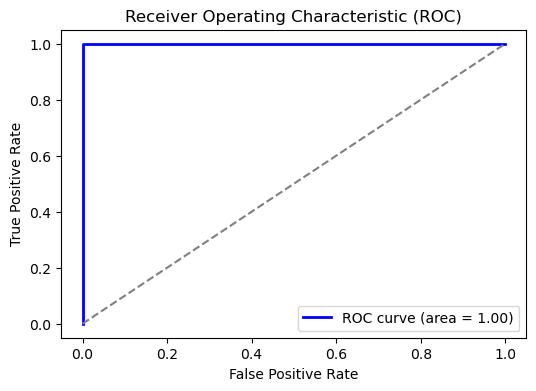

In [13]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()